In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import pandas_datareader.data as web
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline  
 
 
 
symbols = ['GOOGL', 'TSLA', 'FB', 'AMZN', 'AAPL', 'MSFT', 'VOD',  'ADBE', 'NVDA', 'CRM' ]
 
all_stocks = pd.DataFrame()

In [2]:
start = pd.Timestamp('2010-01')
end = pd.Timestamp('2020-12')
data_source = 'yahoo'

In [3]:
def get_symbols(symbols,data_source,ohlc,begin_date=None,end_date=None):
    out = []
    new_symbols = []
    
    for symbol in symbols:
        df = web.DataReader(symbol, data_source, begin_date, end_date)\
        [['High','Low','Open','Close','Volume','Adj Close']]
        new_symbols.append(symbol) 
        out.append(df[ohlc].astype('float'))
        data = pd.concat(out, axis = 1)
        data.columns = new_symbols
        
    return data

In [4]:
all_stocks = get_symbols(symbols,data_source=data_source,ohlc='Adj Close', begin_date=start, end_date=end)

In [5]:
all_stocks.head()

,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
Date,,,,,,,,,,
2010-01-04,313.688690,NaN,NaN,133.899994,6.562590,23.948719,12.062852,37.090000,4.246797,18.705000
2010-01-05,312.307312,NaN,NaN,134.690002,6.573936,23.956459,11.974422,37.700001,4.308810,18.625000
2010-01-06,304.434448,NaN,NaN,132.250000,6.469368,23.809435,11.880790,37.619999,4.336372,18.592501
2010-01-07,297.347351,NaN,NaN,130.000000,6.457408,23.561825,11.657118,36.889999,4.251391,18.510000
2010-01-08,301.311310,NaN,NaN,133.520004,6.500340,23.724319,11.480253,36.689999,4.260576,18.537500


In [6]:
returns = np.log(all_stocks/all_stocks.shift(1)).dropna(how="any")
returns.head()

,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
Date,,,,,,,,,,
2012-05-21,0.022578,0.042968,-0.116378,0.019725,0.056626,0.016266,0.007253,0.022111,0.017235,0.023556
2012-05-22,-0.021912,0.068181,-0.093255,-0.012828,-0.007708,0.000336,0.030714,0.000000,-0.012280,0.002680
2012-05-23,0.014311,0.007117,0.031749,0.009015,0.024107,-0.022084,-0.008520,0.005297,0.024411,0.007732
2012-05-24,-0.009562,-0.024145,0.031680,-0.009433,-0.009226,-0.001375,0.008151,-0.020089,-0.026885,-0.029650
2012-05-25,-0.020299,-0.015644,-0.034497,-0.010978,-0.005374,-0.000344,0.002948,0.001901,0.023665,0.005389


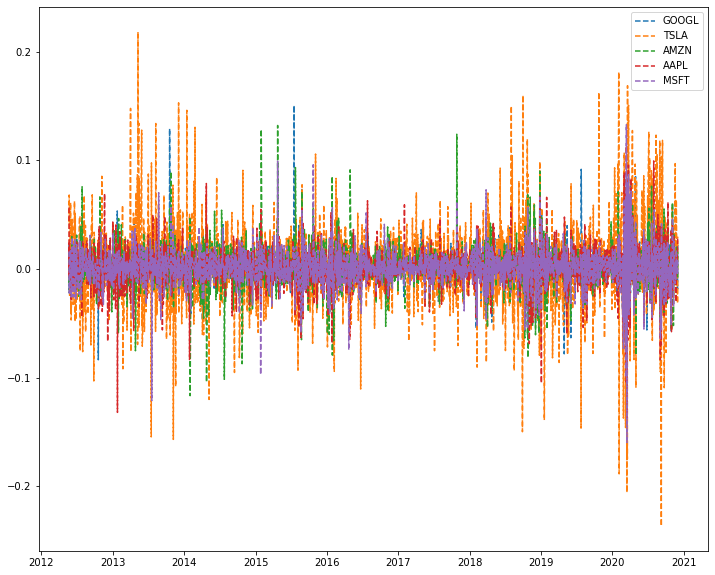

In [7]:
plt.figure(figsize=(12, 10))
plt.plot(returns.index, returns.GOOGL, label='GOOGL', linestyle='dashed')
plt.plot(returns.index, returns.TSLA, label='TSLA', linestyle='dashed')
plt.plot(returns.index, returns.AMZN, label='AMZN', linestyle='dashed')
plt.plot(returns.index, returns.AAPL, label='AAPL', linestyle='dashed')
plt.plot(returns.index, returns.MSFT, label='MSFT', linestyle='dashed')
plt.legend()
plt.show()